<font color=black size=4>
Nama : Yurdha Fadhila Hernawan <br>
Nim : 165150200111094 <br>
Data Mining - D <br>
Tugas Kuis Pra UAS 
</font>

# Klasterisasi menggunakan metode KMeans

In [53]:
import pandas as pd
import numpy as np
import math
import random
import collections
from __future__ import division
import matplotlib.pyplot as plt
# pd.__version__

In [4]:
dataset = [['A1',2,10],
           ['A2',2,5],
           ['A3',8,4],
           ['B1',5,8],
           ['B2',7,5],
           ['B3',6,4],
           ['C1',1,2],
           ['C2',4,9]]

<font color=blue size=4> Dataset dijadikan dalam bentuk dataframe </font>

In [5]:
data = pd.DataFrame(dataset, columns = ['id' , 'x', 'y'])
data

,id,x,y
0,A1,2,10
1,A2,2,5
2,A3,8,4
3,B1,5,8
4,B2,7,5
5,B3,6,4
6,C1,1,2
7,C2,4,9


<font color=blue size=4> Menentukan centroid awal KMeans </font>

In [6]:
centroid_awal = data[(data.id == 'A1') | (data.id == 'B1') | (data.id == 'C1')]
centroid_awal = centroid_awal.drop(columns=['id'])
centroid_awal


,x,y
0,2,10
3,5,8
6,1,2


In [7]:
def kmeans(dataset, centroid, maxepoch):
#     print(dataset)
    print("Centroid awal iterasi")
    print(centroid)
    epoch = 0
    while epoch <maxepoch:
        cluster = []
        if epoch == 1:
            print("\nCentroid setelah eksekusi babak pertama")
            print(centroid)
        for index, item in dataset.iterrows():
            list_distance = []
            for index2, item2 in centroid.iterrows():
                euc_distance = ((item['x']-item2['x'])**2) + ((item['y']-item2['y'])**2)*0.5
                list_distance.append(euc_distance)
            index_min_distance = list_distance.index(min(list_distance))
            cluster.append(index_min_distance+1)
        dataset.insert(epoch + 3, 'cluster', cluster, True)
        centroid = new_centroid_kmeans(dataset)
        epoch+=1
    print("\nCentroid akhir iterasi")
    print(centroid)
    return dataset
            



In [8]:
def new_centroid_kmeans(data):
    cluster = np.unique(data.iloc[:,-1].tolist())
    dataa = data.values.tolist()
    new_centroid = []
    for clus in cluster:
        fitur =[]
        x = [item[1] for item in dataa if item[-1] == clus]
        y = [item[2] for item in dataa if item[-1] == clus]
        xx = float(sum(x)) / float(len(x))
        yy = float(sum(y)) / float(len(y))
        fitur.append(xx)
        fitur.append(yy)
        new_centroid.append(fitur)
    new_cen = pd.DataFrame(new_centroid, columns = ['x', 'y'])
    return new_cen
        
        
    

### Hasil yang didapatkan ketika menggunakan maksimal iterasi sebanyak 5 kali

In [9]:
hasill = kmeans(data.copy(), centroid_awal, 5)
hasill

Centroid awal iterasi
   x   y
0  2  10
3  5   8
6  1   2

Centroid setelah eksekusi babak pertama
     x     y
0  2.0  10.0
1  6.0   6.0
2  1.5   3.5

Centroid akhir iterasi
          x         y
0  3.666667  9.000000
1  7.000000  4.333333
2  1.500000  3.500000


,id,x,y,cluster,cluster,cluster,cluster,cluster
0,A1,2,10,1,1,1,1,1
1,A2,2,5,3,3,3,3,3
2,A3,8,4,2,2,2,2,2
3,B1,5,8,2,2,1,1,1
4,B2,7,5,2,2,2,2,2
5,B3,6,4,2,2,2,2,2
6,C1,1,2,3,3,3,3,3
7,C2,4,9,2,1,1,1,1


### Hasil yang didapatkan ketika menggunakan maksimal iterasi sebanyak 10 kali

In [10]:
hasill = kmeans(data.copy(), centroid_awal, 10)
hasill

Centroid awal iterasi
   x   y
0  2  10
3  5   8
6  1   2

Centroid setelah eksekusi babak pertama
     x     y
0  2.0  10.0
1  6.0   6.0
2  1.5   3.5

Centroid akhir iterasi
          x         y
0  3.666667  9.000000
1  7.000000  4.333333
2  1.500000  3.500000


,id,x,y,cluster,cluster,cluster,cluster,cluster,cluster,cluster,cluster,cluster,cluster
0,A1,2,10,1,1,1,1,1,1,1,1,1,1
1,A2,2,5,3,3,3,3,3,3,3,3,3,3
2,A3,8,4,2,2,2,2,2,2,2,2,2,2
3,B1,5,8,2,2,1,1,1,1,1,1,1,1
4,B2,7,5,2,2,2,2,2,2,2,2,2,2
5,B3,6,4,2,2,2,2,2,2,2,2,2,2
6,C1,1,2,3,3,3,3,3,3,3,3,3,3
7,C2,4,9,2,1,1,1,1,1,1,1,1,1


### Hasil yang didapatkan ketika menggunakan maksimal iterasi sebanyak 15 kali

In [11]:
hasill = kmeans(data.copy(), centroid_awal, 15)
hasill

Centroid awal iterasi
   x   y
0  2  10
3  5   8
6  1   2

Centroid setelah eksekusi babak pertama
     x     y
0  2.0  10.0
1  6.0   6.0
2  1.5   3.5

Centroid akhir iterasi
          x         y
0  3.666667  9.000000
1  7.000000  4.333333
2  1.500000  3.500000


,id,x,y,cluster,cluster,cluster,cluster,cluster,cluster,cluster,cluster,cluster,cluster,cluster,cluster,cluster,cluster,cluster
0,A1,2,10,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,A2,2,5,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2,A3,8,4,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
3,B1,5,8,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1
4,B2,7,5,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
5,B3,6,4,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
6,C1,1,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
7,C2,4,9,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1


### Hasil yang didapatkan ketika menggunakan maksimal iterasi sebanyak 100 kali

In [12]:
hasill = kmeans(data.copy(), centroid_awal, 100)
hasill

Centroid awal iterasi
   x   y
0  2  10
3  5   8
6  1   2

Centroid setelah eksekusi babak pertama
     x     y
0  2.0  10.0
1  6.0   6.0
2  1.5   3.5

Centroid akhir iterasi
          x         y
0  3.666667  9.000000
1  7.000000  4.333333
2  1.500000  3.500000


,id,x,y,cluster,cluster,cluster,cluster,cluster,cluster,cluster,...,cluster,cluster,cluster,cluster,cluster,cluster,cluster,cluster,cluster,cluster
0,A1,2,10,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,A2,2,5,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,A3,8,4,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
3,B1,5,8,2,2,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,B2,7,5,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
5,B3,6,4,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
6,C1,1,2,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
7,C2,4,9,2,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


# Klasterisasi menggunakan metode DBScan

In [13]:
def euc_distance(data, center):
    list_dist = []
    for index, item in data.iterrows():
        euc_distance = math.sqrt(((item['x']-center['x'])**2) + ((item['y']-center['y'])**2))
        list_dist.append(euc_distance)
    return list_dist     

In [30]:
def dbscan(dataset, eps, minPts):  
    cluster = 0
    list_cluster = dataset['cluster'].values

    while np.count_nonzero(list_cluster) < len(dataset):
        
        center = dataset.sample()
        if center['cluster'].values[0] == 0:
            list_distance = euc_distance(dataset, center)
            neighboor_and_center = []

            for index, item in enumerate(list_distance):
                if item <= eps:
                    neighboor_and_center.append(index)

            index_of_center = list_distance.index(min(list_distance))

            if (len(neighboor_and_center) - 1) >= minPts:
                cluster+=1
                dataset.loc[index_of_center, 'cluster'] = cluster
                get_another_neighboor(dataset, neighboor_and_center, eps, minPts, cluster)

            else :
                dataset.loc[index_of_center, 'cluster'] = -1
#     print(dataset)
    return(dataset)
        
    

In [19]:
def get_another_neighboor(dataset, neighboor_and_center, eps, minPts, cluster):
    
    for index_n in neighboor_and_center:
        if dataset.iloc[index_n]['cluster'] == 0:
            dataset.loc[index_n, 'cluster'] = cluster
            list_distance = euc_distance(dataset, dataset.iloc[index_n])
            neighboor_and_center = []

            for index_nn, item in enumerate(list_distance):
                if item <= eps:
                    neighboor_and_center.append(index_nn)
            get_another_neighboor(dataset, neighboor_and_center, eps, minPts, cluster)


In [20]:
def set_init_clus(dataset):
    cluster = [0,0,0,0,0,0,0,0]
    dataset.insert(3, 'cluster', cluster, True)
    return dataset

### Hasil yang didapatkan ketika menggunakan epsilon = 3.2 dan minPTs = 2 

   id  x   y  cluster
0  A1  2  10       -1
1  A2  2   5       -1
2  A3  8   4        1
3  B1  5   8        2
4  B2  7   5        1
5  B3  6   4        1
6  C1  1   2       -1
7  C2  4   9        2


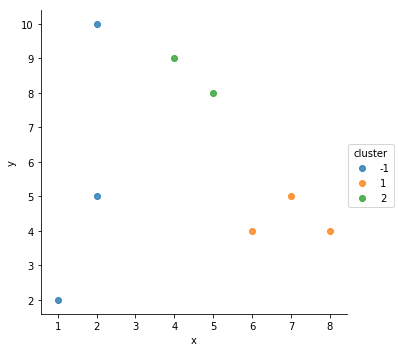

In [82]:
data_dbscan = set_init_clus(data.copy())
eps = 3.2
minPts = 2
result = dbscan(data_dbscan.copy(), eps, minPts)
print(result)
facet = sns.lmplot(data=result, x='x', y='y', hue='cluster', 
                   fit_reg=False, legend=True, legend_out=True)

### Hasil yang didapatkan ketika menggunakan epsilon = 3.2 dan minPTs = 1 

   id  x   y  cluster
0  A1  2  10        3
1  A2  2   5        2
2  A3  8   4        1
3  B1  5   8        3
4  B2  7   5        1
5  B3  6   4        1
6  C1  1   2        2
7  C2  4   9        3


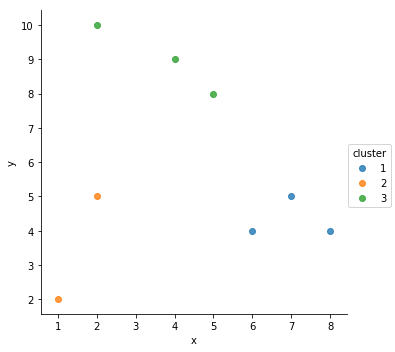

In [83]:
data_dbscan = set_init_clus(data.copy())
eps = 3.2
minPts = 1
result = dbscan(data_dbscan.copy(), eps, minPts)
print(result)
facet = sns.lmplot(data=result, x='x', y='y', hue='cluster', 
                   fit_reg=False, legend=True, legend_out=True)

### Hasil yang didapatkan ketika menggunakan epsilon  = 2 dan minPTs = 2 

   id  x   y  cluster
0  A1  2  10       -1
1  A2  2   5       -1
2  A3  8   4        1
3  B1  5   8       -1
4  B2  7   5        1
5  B3  6   4        1
6  C1  1   2       -1
7  C2  4   9       -1


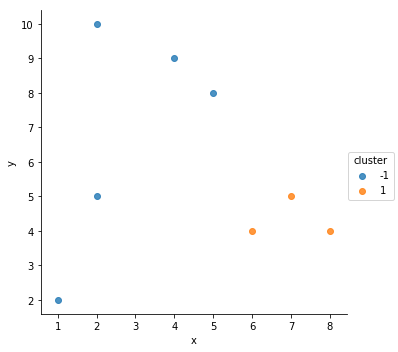

In [84]:
data_dbscan = set_init_clus(data.copy())
eps = 2
minPts = 2
result = dbscan(data_dbscan.copy(), eps, minPts)
print(result)
facet = sns.lmplot(data=result, x='x', y='y', hue='cluster', 
                   fit_reg=False, legend=True, legend_out=True)

### Hasil yang didapatkan ketika menggunakan epsilon =  2 dan minPTs = 1

   id  x   y  cluster
0  A1  2  10       -1
1  A2  2   5       -1
2  A3  8   4        2
3  B1  5   8        1
4  B2  7   5        2
5  B3  6   4        2
6  C1  1   2       -1
7  C2  4   9        1


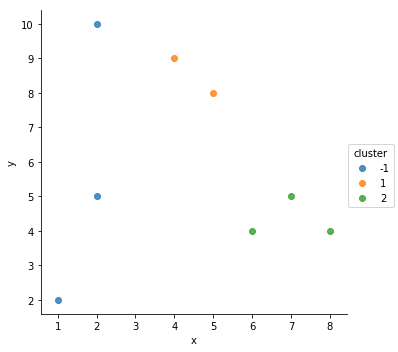

In [86]:
data_dbscan = set_init_clus(data.copy())
eps = 2
minPts = 1
result = dbscan(data_dbscan.copy(), eps, minPts)
print(result)
facet = sns.lmplot(data=result, x='x', y='y', hue='cluster', 
                   fit_reg=False, legend=True, legend_out=True)

### Hasil yang didapatkan ketika menggunakan epsilon = 4 dan minPTs = 2 

   id  x   y  cluster
0  A1  2  10        1
1  A2  2   5       -1
2  A3  8   4        1
3  B1  5   8        1
4  B2  7   5        1
5  B3  6   4        1
6  C1  1   2       -1
7  C2  4   9        1


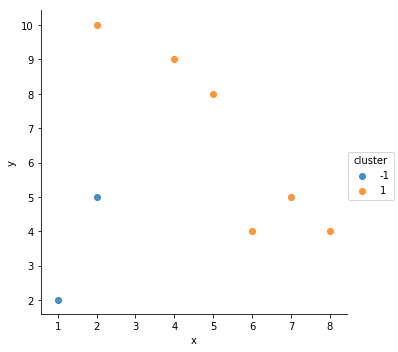

In [87]:
data_dbscan = set_init_clus(data.copy())
eps = 4
minPts = 2
result = dbscan(data_dbscan.copy(), eps, minPts)
print(result)
facet = sns.lmplot(data=result, x='x', y='y', hue='cluster', 
                   fit_reg=False, legend=True, legend_out=True)

### Hasil yang didapatkan ketika menggunakan epsilon = 4 dan minPTs = 3

   id  x   y  cluster
0  A1  2  10        1
1  A2  2   5       -1
2  A3  8   4        1
3  B1  5   8        1
4  B2  7   5        1
5  B3  6   4        1
6  C1  1   2       -1
7  C2  4   9        1


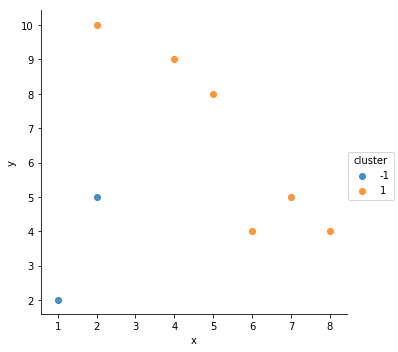

In [89]:
data_dbscan = set_init_clus(data.copy())
eps = 4
minPts = 3
result = dbscan(data_dbscan.copy(), eps, minPts)
print(result)
facet = sns.lmplot(data=result, x='x', y='y', hue='cluster', 
                   fit_reg=False, legend=True, legend_out=True)

# Kesimpulan dan Analisis

<font color=black size=3>
Perhitungan menggunakan DBScan dapat menghasilkan beberapa cluster data yang tidak tetap dan berbeda tergantung dengan nilai epsilon dan minimal Pts yang ditentukan. Pada saat menggunakan alrgotitma KMeans telah ditentukan diawal data yang dijadikan pusat cluster (centroid), sehingga jumlah cluster yang muncul diakhir perhitungan tidak akan kurang atau melebihi jumlah centroid. Hal ini akan menimbulkan noise apabila ada data yang bersifat <font color=blue size=3>outlier</font>. Outlier data merupakan data yang memiliki jarak yang jauh dari pusat data lainnya yang sejenis, yang mana seharusnya tidak termasuk dalam cluster data yang serupa / mirip tersebut.
    
   </font>

In [77]:
data_dbscan = set_init_clus(data.copy())
eps = 3.2
minPts = 2
result = dbscan(data_dbscan.copy(), eps, minPts)
print(result)

   id  x   y  cluster
0  A1  2  10        1
1  A2  2   5       -1
2  A3  8   4        2
3  B1  5   8        1
4  B2  7   5        2
5  B3  6   4        2
6  C1  1   2       -1
7  C2  4   9        1


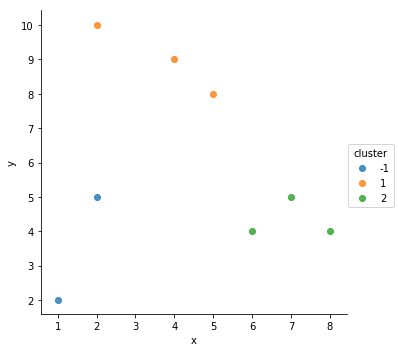

In [78]:
facet = sns.lmplot(data=result, x='x', y='y', hue='cluster', 
                   fit_reg=False, legend=True, legend_out=True)

<font color=black size=3>
Pada hasil yang didapatkan proses DBScan dengan menggunakan eps = 3.2 dan minPts = 2 didapatkan hasil bahwa data A2 dan C1 merupakan outlier. Hal ini karna data tersebut berada jauh dari pusat cluster lainnya. 
</font>

In [80]:
data_dbscan = set_init_clus(data.copy())
eps = 3.2
minPts = 1
result = dbscan(data_dbscan.copy(), eps, minPts)
print(result)

   id  x   y  cluster
0  A1  2  10        2
1  A2  2   5        1
2  A3  8   4        3
3  B1  5   8        2
4  B2  7   5        3
5  B3  6   4        3
6  C1  1   2        1
7  C2  4   9        2


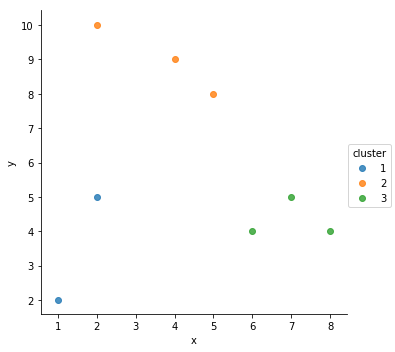

In [81]:
facet = sns.lmplot(data=result, x='x', y='y', hue='cluster', 
                   fit_reg=False, legend=True, legend_out=True)

<font color=black size=3>
Namun apabila nilai dari minimal Pts diubah menjadi 1, maka akan didapatkan jumlah cluster sebanyak 3, yang mana data A2 dan C1 dapat dikelompokkan dalam cluster yang sama.
</font>